Welcome to your DataCamp project audition! This notebook must be filled out and vetted before a contract can be signed and you can start creating your project.

The first step is forking the repository in which this notebook lives. After that, there are two parts to be completed in this notebook:

- **Project information**:  The title of the project, a project description, etc.

- **Project introduction**: The three first text and code cells that will form the introduction of your project.

When complete, please email the link to your forked repo to projects@datacamp.com with the email subject line _DataCamp project audition_. If you have any questions, please reach out to projects@datacamp.com.

# Project information

**Project title**: The marvel hero graph 

**Name:** Pierre Gutierrez

**Email address associated with your DataCamp account:** pierre.j.p.gutierrez@gmail.com

**Project description**: This will be read by the students on the DataCamp platform **before** deciding to start the project. The description should be three paragraphs, written in Markdown.

- Paragraph 1 should be an exciting introduction to analysis/model/etc. students will complete.
- Paragraph 2 should list the background knowledge you assume the student doing this project will have, the more specific the better. Please list things like modules, tools, functions, methods, statistical concepts, etc.
- Paragraph 3 should describe and link to (if possible) the dataset used in the project.

Graphs are a very usefull tool in the data scientist toolbox. Their most famous usage is of course, the analysis of social network interactions. But graphs are also widely used in other domains 
Here, we propose to study how to create and draw graphs using a Marvel hero interaction dataset. 

In this project, we assume the student to have basics in python. We will start by loading and manipulating the data using pandas. Then we will transition to graph analysis. The student are going to create a network using the networkx package. Then they are going to use 

# Project introduction

***Note: nothing needs to be filled out in this cell. It is simply setting up the template cells below.***

The final output of a DataCamp project looks like a blog post: pairs of text and code cells that tell a story about data. The text is written from the perspective of the data analyst and *not* from the perspective of an instructor on DataCamp. So, for this blog post intro, all you need to do is pretend like you're writing a blog post -- forget the part about instructors and students.

Below you'll see the structure of a DataCamp project: a series of "tasks" where each task consists of a title, a **single** text cell, and a **single** code cell. There are 8-12 tasks in a project and each task can have up to 10 lines of code. What you need to do:
1. Read through the template structure.
2. As best you can, divide your project as it is currently visualized in your mind into tasks.
3. Fill out the template structure for the first three tasks of your project.

As you are completing each task, you may wish to consult the project notebook format in our [documentation](https://instructor-support.datacamp.com/projects/datacamp-projects-jupyter-notebook). Only the `@context` and `@solution` cells are relevant to this audition.

## 1. Loading the data

An exciting intro to the analysis. Provide context on the problem you're going to solve, the dataset(s) you're going to use, the relevant industry, etc. You may wish to briefly introduce the techniques you're going to use. Tell a story to get students excited! It should at most have 1200 characters.

The most common error instructors make in **context cells** is referring to the student or the project. We want project notebooks to appear as a blog post or a data analysis. Bad: *"In this project, you will..."* Good: *"In this notebook, we will..."*

The first task in projects often involve loading data. Please store any data files you use in the `datasets/` folder in this repository.

Images are welcome additions to every Markdown cell, but especially this first one. Make sure the images you use have a [permissive license](https://support.google.com/websearch/answer/29508?hl=en) and display them using [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#images). Store your images in the `img/` folder in this repository.


OK, we are ready to go, let's start by importing the csv data in a pandas DataFrame. pandas is a great python library for data processing.

In [3]:
import pandas as pd
marvel_data = pd.read_csv("datasets/hero_network.csv")
marvel_data.head()

,id1,id2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


## 2. Who's your favourite hero ? 

Context / background / story / etc. This cell should at most have 800 characters.

The most common error instructors make in **context cells** is referring to the student or the project. We want project notebooks to appear as a blog post or a data analysis. Bad: *"In this task, you will..."* Good: *"Next, we will..."*

In [24]:
id1 = marvel_data["id1"]
id2 = marvel_data["id2"]
id_list = pd.concat([id1,id2])
counts = id_list.value_counts()
counts.head(10)
#counts.tail(10)

CAPTAIN AMERICA         16499
SPIDER-MAN/PETER PAR    13717
IRON MAN/TONY STARK     11817
THOR/DR. DONALD BLAK    11427
THING/BENJAMIN J. GR    10681
WOLVERINE/LOGAN         10353
HUMAN TORCH/JOHNNY S    10237
SCARLET WITCH/WANDA      9911
MR. FANTASTIC/REED R     9775
VISION                   9696
dtype: int64

## 3. Creating the networkx graph 

Context / background / story / etc. This cell should at most have 800 characters.

The most common error instructors make in **context cells** is referring to the student or the project. We want project notebooks to appear as a blog post or a data analysis. Bad: *"In this task, you will..."* Good: *"Next, we will..."*

In [21]:
import networkx as nx
nx_graph = nx.from_pandas_dataframe(marvel_data,"id1","id2")

degrees = nx_graph.degree()
degrees = pd.Series(degrees).sort_values(ascending = False)
degrees

CAPTAIN AMERICA         1905
SPIDER-MAN/PETER PAR    1737
IRON MAN/TONY STARK     1521
THING/BENJAMIN J. GR    1416
MR. FANTASTIC/REED R    1377
WOLVERINE/LOGAN         1368
HUMAN TORCH/JOHNNY S    1361
SCARLET WITCH/WANDA     1322
THOR/DR. DONALD BLAK    1289
BEAST/HENRY &HANK& P    1265
VISION                  1238
INVISIBLE WOMAN/SUE     1236
HAWK                    1175
WASP/JANET VAN DYNE     1091
ANT-MAN/DR. HENRY J.    1082
CYCLOPS/SCOTT SUMMER    1078
SHE-HULK/JENNIFER WA    1071
STORM/ORORO MUNROE S    1070
ANGEL/WARREN KENNETH    1070
DR. STRANGE/STEPHEN     1065
HULK/DR. ROBERT BRUC    1055
PROFESSOR X/CHARLES     1032
WONDER MAN/SIMON WIL    1031
COLOSSUS II/PETER RA    1023
MARVEL GIRL/JEAN GRE    1003
HERCULES [GREEK GOD]     989
JARVIS, EDWIN            986
SUB-MARINER/NAMOR MA     979
DAREDEVIL/MATT MURDO     967
ICEMAN/ROBERT BOBBY      944
                        ... 
MURRAY, WILLIAM T. B       1
GLORIOLE                   1
DRAGO, VALERIE             1
GARNOK REBBAHN

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

#nx.draw(nx_graph)
#plt.draw()

*Stop here! Only the three first tasks. :)*

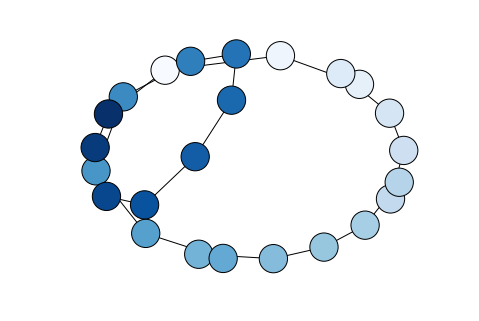

In [8]:

G = nx.cycle_graph(24)
pos = nx.spring_layout(G, iterations=200)
nx.draw(G, pos, node_color=range(24), node_size=800, cmap=plt.cm.Blues)
plt.show()

In [25]:
# need to check duplicates in edges
# need to get the best plotting library
# need to check how to filter on degree. 
